<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_17_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Natural Language Processing (NLP)**
Split the set into training and test, remember about stratification. Then train the **Random Forest** model from which to extract **feature importance**. Based on this, make a selection of features and take only those whose importance is greater than 0.001. It will train a new Random Forest model with selection of hyperparameters using **GridSearch**. Use learned techniques for **vectorization**.

In [58]:
# loading the appropriate libraries
import numpy as np
import pandas as pd
import string
import nltk
import itertools
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import warnings
warnings.filterwarnings('ignore')

Loading the dataset that we will work on, it concerns whether the message is **spam (0)** or **not spam (1)**.

In [59]:
spam_dataset = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/17/spam.csv', encoding='ISO-8859-1', usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['spam', 'ham'], [0, 1])
spam_dataset

,Spam,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [60]:
spam_dataset['Spam'].value_counts(normalize=True)

1    0.865937
0    0.134063
Name: Spam, dtype: float64

We can see that most messages are not spam.

### **Remove punctuation marks**

In order to select punctuation marks, we use the **string** library and the **punctuation** function. It returns the above characters as a string. Based on this, we will create a **function** that will reject values belonging to punctuation marks.

In [61]:
def remove_punctation(text):
  cleaned = ''.join([word for word in text if word not in string.punctuation])
  return cleaned

spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_punctation(x))
spam_dataset

,Spam,Text,Cleaned_Text
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,1,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,1,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


### **Tokenization**
The process of dividing text into smaller pieces called tokens. We convert each word to lowercase because we assume that capital letters at the beginning of a sentence do not convey information from the semantic meaning.

In [62]:
nltk.download('punkt')

def tokenize(text):

  # remove capital letter
  clean_text = text.lower()

  # tokenization
  tokenized_text = nltk.word_tokenize(clean_text)
  return tokenized_text

spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))
spam_dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Spam,Text,Cleaned_Text,Tokenized_Text
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,1,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,1,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,1,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


### **Removing stopwords**
Stopwords are words in any language that do not add much to a sentence, e.g. 'the', 'at', 'is', etc. We should remove stopwords because they do not add any information to our model,

In [63]:
# create a list of stopwords
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# create a function excluding stopwords
def remove_stopwords(text):
  without_stopwords = [word for word in text if word not in stopwords]
  return without_stopwords

spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,1,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,1,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,1,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


### **Stemming**
Thanks to the stemming technique, we reduce the number of occurrences of a word to its source form. This is how we normalize the text. Simply put, stemming is the process of removing parts of a word or reducing a word to its root or root.

In [65]:
stemmer = nltk.PorterStemmer()
def stemming(text):
  stemmed_words = [stemmer.stem(word) for word in text]
  return stemmed_words

spam_dataset['Stemmed_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: stemming(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,1,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,1,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,1,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


### **Lemmatization**

It is another text processing technique. In both stemming and lemmatization, we try to reduce a given word to its root word. In the process of stemming, the source word is called a **stem**, and in the process of lemmatization - a **lemma**.

In [66]:
nltk.download('wordnet')

lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
  lemamtized_words = [lemmater.lemmatize(word) for word in text]
  return lemamtized_words

spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text,Lemmatized_Text
0,1,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,1,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,1,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,1,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,1,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,1,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


Based on the lemmatized e-mails, we will create a string that is a combination of all the words for e-mails that are spam and for e-mails that are not spam. Then we create a word cloud for both.

In [67]:
words_spam = list(spam_dataset.loc[spam_dataset['Spam']==1, 'Lemmatized_Text'].values)
words_spam = list(itertools.chain.from_iterable(words_spam))
words_spam = ' '.join(words_spam)
words_notspam = list(spam_dataset.loc[spam_dataset['Spam']==0, 'Lemmatized_Text'].values)
words_notspam = list(itertools.chain.from_iterable(words_notspam))
words_notspam = ' '.join(words_notspam)

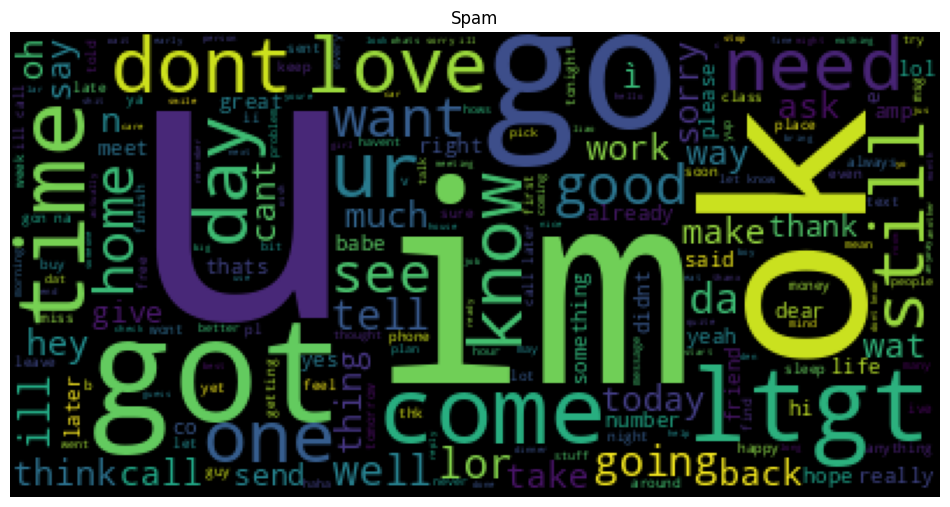

In [68]:
# cloud for spam words
wordcloud = WordCloud().generate(words_spam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Spam')
plt.show()

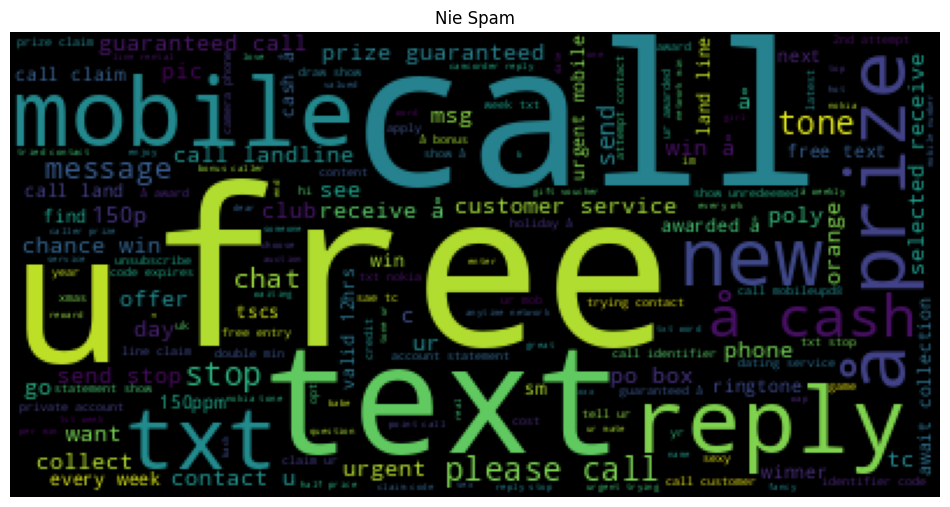

In [69]:
# cloud for not spam words
wordcloud = WordCloud().generate(words_notspam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Nie Spam')
plt.show()

## **Task 17.2 Machine Learning**

In order to do the task we need to **split** our dataset into train and test sets. We will use **Random Forest Classifier**  fot training. Based on this, we will make a selection of features and take only those whose importance is greater than 0.001. It will train a new Random Forest model with selection of hyperparameters using GridSearch. We will start with vactorization.


In [70]:
# TF-IDF vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
print(X.shape)
y = spam_dataset['Spam']
print(y.shape)

(5572, 8841)
(5572,)


In [71]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# train the model
from sklearn.ensemble import RandomForestClassifier
rf_v1 = RandomForestClassifier()
rf_v1.fit(X_train, y_train)
rf_v1.score(X_test, y_test)

0.9721973094170404

We will **create a function** that calculates the most important metrics and draws graphs.

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metrics for tested model ################

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



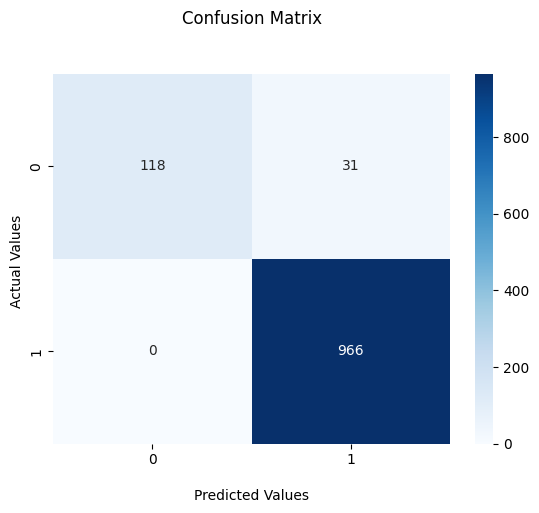

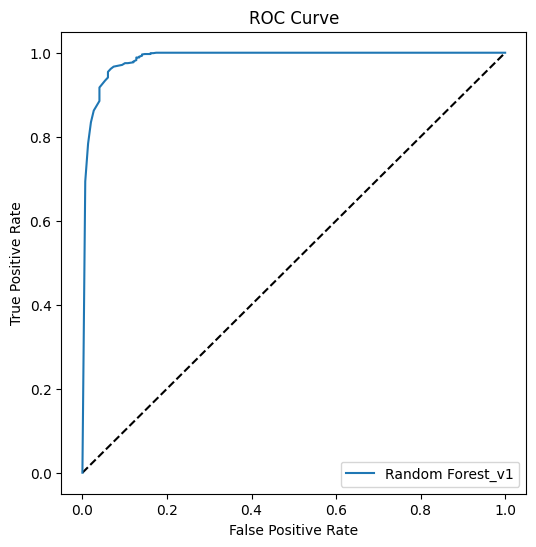

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296


In [74]:
calculate_metrics(rf_v1, 'Random Forest_v1', X_test, y_test)

## **Random Forest Classifier with hyperparameters**

In [75]:
X = spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x))
y = spam_dataset['Spam']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2, stratify=y)

In [77]:
from sklearn.pipeline import Pipeline

rf_v2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf_v2', RandomForestClassifier(random_state=42))
])

In [78]:
list(rf_v2.get_params().keys())

['memory',
 'steps',
 'verbose',
 'vectorizer',
 'rf_v2',
 'vectorizer__analyzer',
 'vectorizer__binary',
 'vectorizer__decode_error',
 'vectorizer__dtype',
 'vectorizer__encoding',
 'vectorizer__input',
 'vectorizer__lowercase',
 'vectorizer__max_df',
 'vectorizer__max_features',
 'vectorizer__min_df',
 'vectorizer__ngram_range',
 'vectorizer__preprocessor',
 'vectorizer__stop_words',
 'vectorizer__strip_accents',
 'vectorizer__token_pattern',
 'vectorizer__tokenizer',
 'vectorizer__vocabulary',
 'rf_v2__bootstrap',
 'rf_v2__ccp_alpha',
 'rf_v2__class_weight',
 'rf_v2__criterion',
 'rf_v2__max_depth',
 'rf_v2__max_features',
 'rf_v2__max_leaf_nodes',
 'rf_v2__max_samples',
 'rf_v2__min_impurity_decrease',
 'rf_v2__min_samples_leaf',
 'rf_v2__min_samples_split',
 'rf_v2__min_weight_fraction_leaf',
 'rf_v2__n_estimators',
 'rf_v2__n_jobs',
 'rf_v2__oob_score',
 'rf_v2__random_state',
 'rf_v2__verbose',
 'rf_v2__warm_start']

In [79]:
from sklearn.model_selection import GridSearchCV

params = {
    'vectorizer__max_df': [0.2, 0.5, 0.7],
    'vectorizer__min_df': [0.001, 0.010, 0.050],
    'vectorizer__ngram_range': [(1, 1), (2, 2)],
    'rf_v2__max_depth': [2, 5, 7],
    'rf_v2__random_state': [0, 42]
}

grid_search = GridSearchCV(rf_v2, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Selected hyperparameters: ', grid_search.best_params_)
rf_v3 = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Selected hyperparameters:  {'rf_v2__max_depth': 7, 'rf_v2__random_state': 42, 'vectorizer__max_df': 0.2, 'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 1)}


              precision    recall  f1-score   support

           0       1.00      0.52      0.68       149
           1       0.93      1.00      0.96       966

    accuracy                           0.94      1115
   macro avg       0.97      0.76      0.82      1115
weighted avg       0.94      0.94      0.93      1115



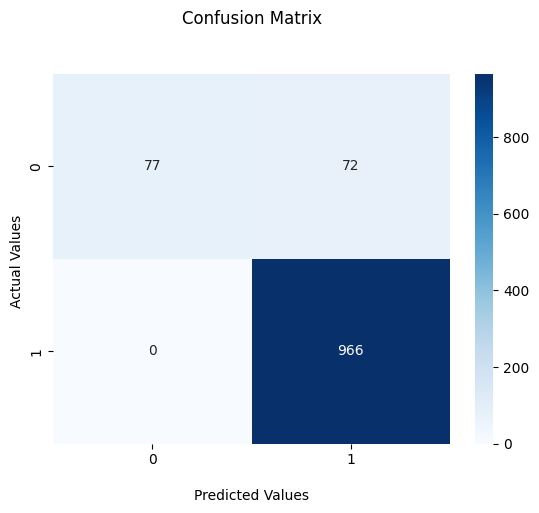

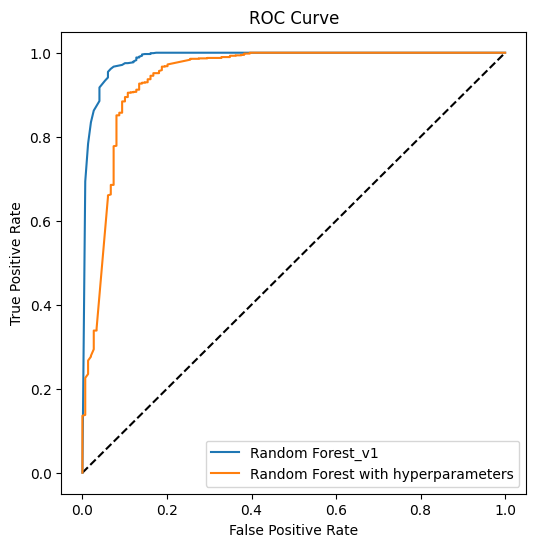

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296
1,Random Forest with hyperparameters,0.964072,0.943453


In [80]:
calculate_metrics(rf_v3, 'Random Forest with hyperparameters', X_test, y_test)

In [81]:
# Perform the GridSearch using the selected features
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('rf_v2',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf_v2__max_depth': [2, 5, 7],
                         'rf_v2__random_state': [0, 42],
                         'vectorizer__max_df': [0.2, 0.5, 0.7],
                         'vectorizer__min_df': [0.001, 0.01, 0.05],
                         'vectorizer__ngram_range': [(1, 1), (2, 2)]},
             scoring='f1_macro', verbose=10)

In [82]:
# Get the best estimator from the GridSearch
best_pipeline = grid_search.best_estimator_

In [83]:
# Extract feature importances from the trained Random Forest
best_rf_clf = best_pipeline.named_steps['rf_v2']
vectorizer = best_pipeline.named_steps['vectorizer']
X_train_vectorized = vectorizer.transform(X_train)
feature_importance = best_rf_clf.feature_importances_

In [84]:
# Get the selected feature indices with importance greater than 0.001
selected_features_indices = np.where(feature_importance > 0.001)[0]

# Re-vectorize the data with only the selected features
X_train_selected = X_train_vectorized[:, selected_features_indices]

In [85]:
# Train the new Random Forest model using only the selected features
best_rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [86]:
# Make predictions on the test set
X_test_vectorized = vectorizer.transform(X_test)
X_test_selected = X_test_vectorized[:, selected_features_indices]
y_pred = best_rf_clf.predict(X_test_selected)

## **Task 17.3 Remaining metrics**

              precision    recall  f1-score   support

           0       0.97      0.58      0.73       149
           1       0.94      1.00      0.97       966

    accuracy                           0.94      1115
   macro avg       0.95      0.79      0.85      1115
weighted avg       0.94      0.94      0.94      1115



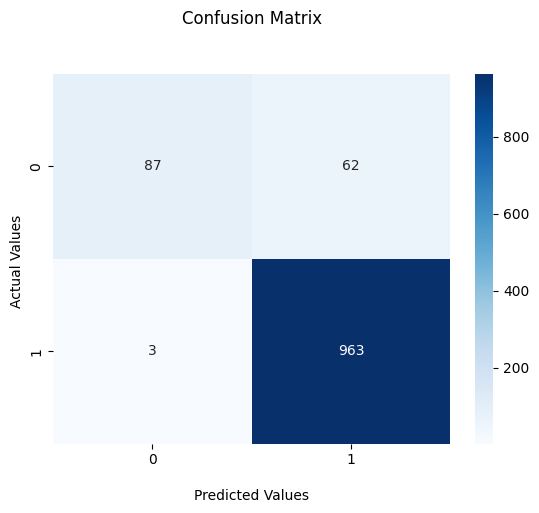

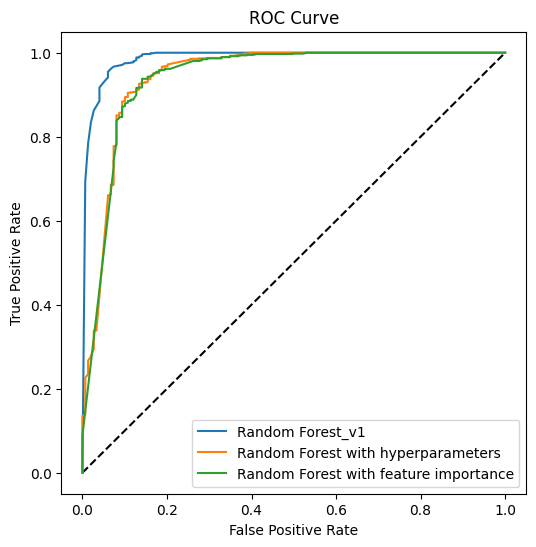

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296
1,Random Forest with hyperparameters,0.964072,0.943453
2,Random Forest with feature importance,0.967353,0.940747


In [87]:
calculate_metrics(best_rf_clf, 'Random Forest with feature importance', X_test_selected, y_test)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = rf_v2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier())])

              precision    recall  f1-score   support

           0       1.00      0.36      0.53       149
           1       0.91      1.00      0.95       966

    accuracy                           0.91      1115
   macro avg       0.96      0.68      0.74      1115
weighted avg       0.92      0.91      0.90      1115



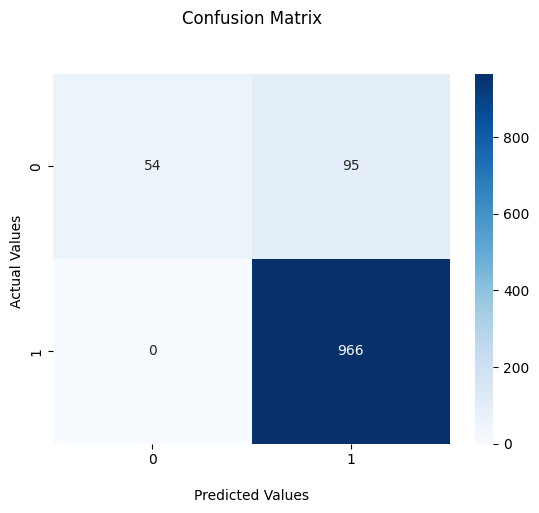

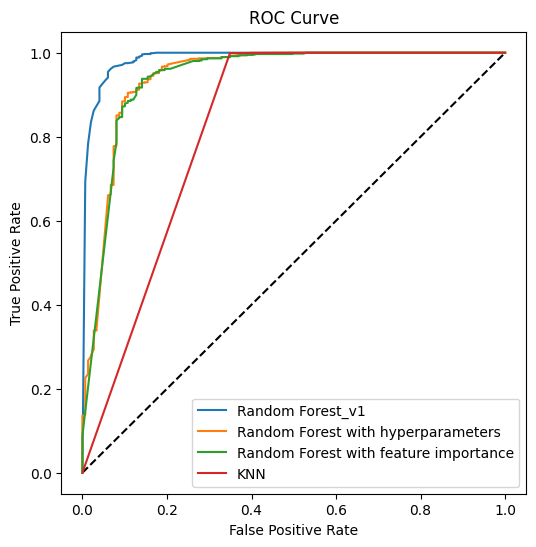

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296
1,Random Forest with hyperparameters,0.964072,0.943453
2,Random Forest with feature importance,0.967353,0.940747
3,KNN,0.953133,0.825222


In [90]:
calculate_metrics(knn_pipeline, 'KNN', X_test, y_test)

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = rf_v2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tree', DecisionTreeClassifier())
])

tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tree', DecisionTreeClassifier())])

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       149
           1       0.97      0.99      0.98       966

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115



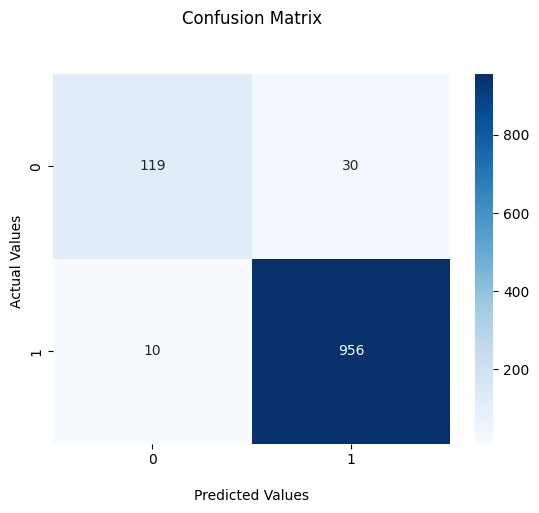

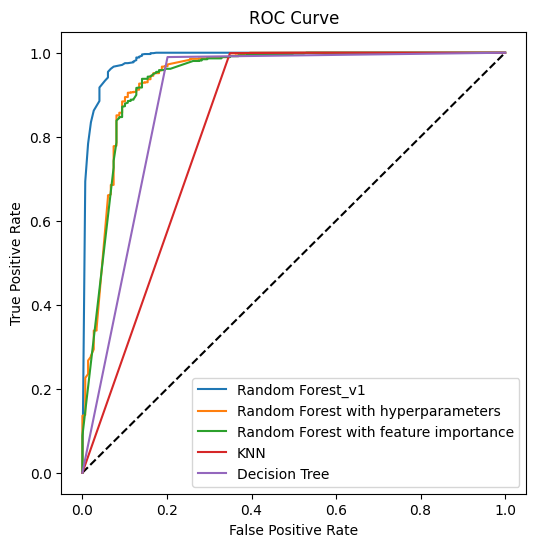

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296
1,Random Forest with hyperparameters,0.964072,0.943453
2,Random Forest with feature importance,0.967353,0.940747
3,KNN,0.953133,0.825222
4,Decision Tree,0.979508,0.894153


In [92]:
calculate_metrics(tree_pipeline, 'Decision Tree', X_test, y_test)

In [96]:
from sklearn.svm import SVC
svm_pipeline = rf_v2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svm', SVC(kernel='rbf', probability=True))
])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svm', SVC(probability=True))])

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       149
           1       0.97      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



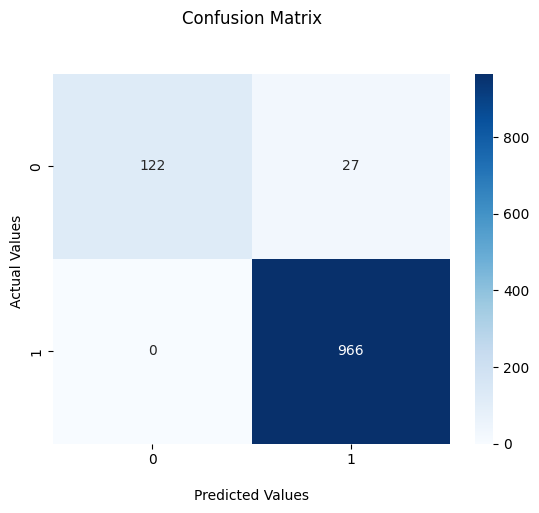

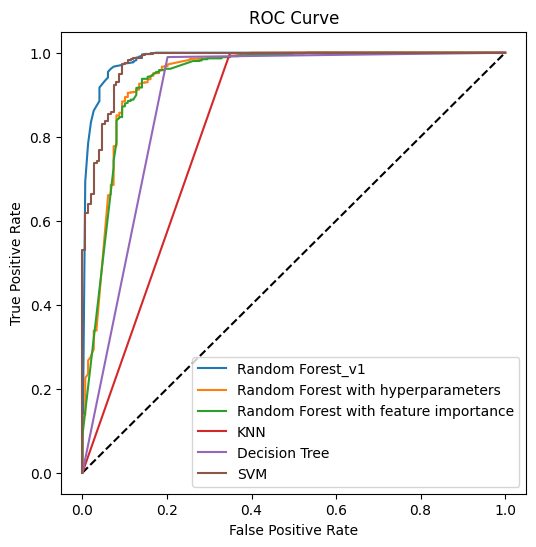

,Model,F1_score,AUC
0,Random Forest_v1,0.984208,0.986296
1,Random Forest with hyperparameters,0.964072,0.943453
2,Random Forest with feature importance,0.967353,0.940747
3,KNN,0.953133,0.825222
4,Decision Tree,0.979508,0.894153
5,SVM,0.986217,0.978191


In [97]:
calculate_metrics(svm_pipeline, 'SVM', X_test, y_test)